In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
data = pd.read_excel('Data Files\lrm.xlsx')

In [4]:
data

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


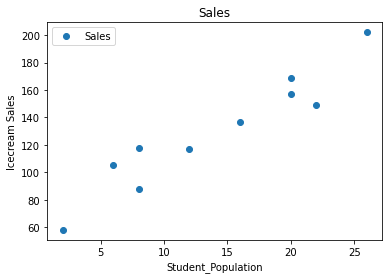

In [5]:
data.plot('Student_Population', 'Sales', style='o')
plt.ylabel('Icecream Sales')
plt.title('Sales')
plt.show()

In [6]:
import statsmodels.api as s
St_pop = data['Student_Population']
sales = data['Sales']
st_pop = s.add_constant(St_pop)
model1 = s.OLS(sales, st_pop)
result1 = model1.fit()
result1.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        17:57:24   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
x = data['Student_Population'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)

In [8]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [9]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

In the ice-cream vendor example, the estimated regression equation $yhat = 60 + 5x$ provides an estimate of the relationship between the size of the student population x and quarterly sales y. 

In [10]:
# Point estimate
reg.predict([[10]])

array([[110.]])

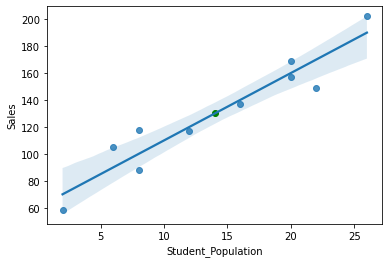

In [11]:
x = data['Student_Population']
y = data['Sales']

plt.figure()
sns.regplot(x=x, y=y, fit_reg=True)
plt.scatter(np.mean(x), np.mean(y), color='green')

#### Prediction Interval

In [12]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(result1, alpha=0.05)
fitted_values = data1[:, 2]
predict_mean_se = data1[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data1[:, 4:6].T
predict_ci_low, predict_ci_upp = data1[:, 6:8].T

In [13]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [14]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [15]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [16]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


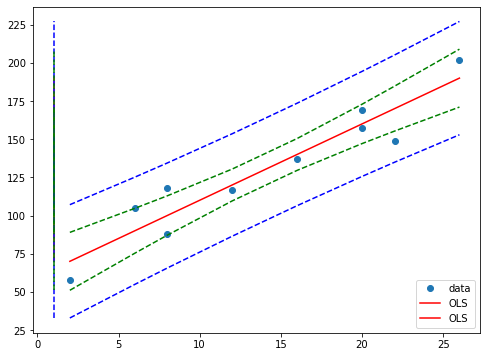

In [17]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'o', label='data')
ax.plot(X, fitted_values, 'r-', label='OLS')
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc='best')
plt.show()

#### Plotting residual Plots

<AxesSubplot:xlabel='Student_Population', ylabel='Sales'>

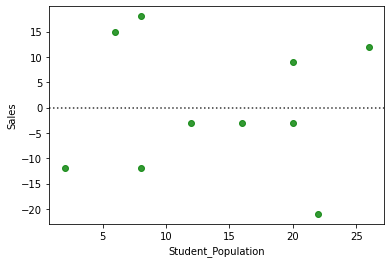

In [18]:
import seaborn as sns
sns.residplot(x=data['Student_Population'], y=data['Sales'], color='g')

In [19]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [20]:
df1 = pd.read_excel('Data Files\icecream.xlsx')

In [21]:
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [22]:
Reg1 = ols(formula='Sales ~ Student_Population', data=df1)
Fit1 = Reg1.fit()
Fit1.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        17:57:26   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
anova_lm(Fit1)

,df,sum_sq,mean_sq,F,PR(>F)
Student_Population,1.0,14200.0,14200.00,74.248366,0.000025
Residual,8.0,1530.0,191.25,NaN,NaN


In [24]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external

In [25]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

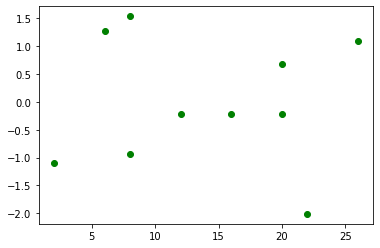

In [26]:
plt.figure()
plt.scatter(df1['Student_Population'], resid_student, color='green')

##### Normal Probability Plot

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


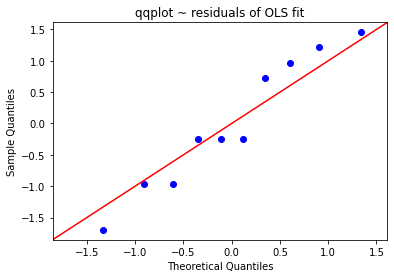

In [27]:
from scipy import stats
import statsmodels.api as sm

res = Fit1.resid # residuals
probplot = sm.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot ~ residuals of OLS fit')
plt.show()


### Multiple Linear Regression Models

In [28]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [29]:
df1 = pd.read_excel('Data Files\TRUCKING.xlsx')
df1

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


x1 = miles travelled

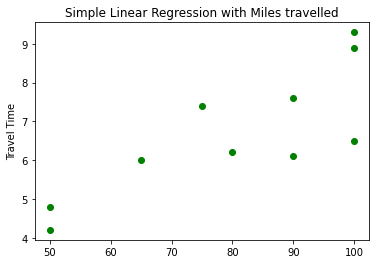

In [30]:
plt.scatter(df1['x1'], df1['travel_time'], color='green')
plt.ylabel('Travel Time')
plt.title('Simple Linear Regression with Miles travelled')
plt.show()

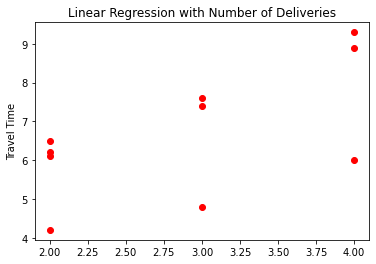

In [31]:
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color='red')
plt.ylabel('Travel Time')
plt.title('Linear Regression with Number of Deliveries')
plt.show()

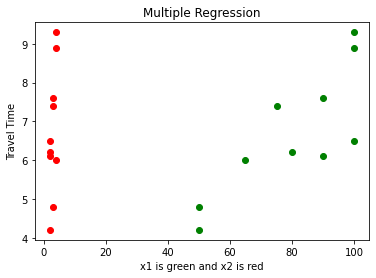

In [32]:
plt.scatter(df1['x1'], df1['travel_time'], color='green')
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color='red')
plt.ylabel('Travel Time')
plt.title('Multiple Regression')
plt.xlabel('x1 is green and x2 is red')
plt.show()

In [33]:
Reg1 = ols(formula='travel_time ~ x1', data=df1)
fit1 = Reg1.fit()
fit1.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Thu, 10 Mar 2022   Prob (F-statistic):            0.00408
Time:                        17:57:27   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.390      -1.956       4.504
x1             0.0678      0.017      3.977      0.004       0.028       0.107
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.623
Skew:                          -0.333   Prob(JB):                        0.732
Kurtosis:                       1.974   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

yhat = 1.2739 + 0.0678 * x1

In [34]:
model = ols('travel_time ~ x1 + n_of_deliveries', data=df1).fit()
model.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           0.000276
Time:                        17:57:27   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

yhat = -0.8687 + 0.0611 * x1 + 0.9234 * n_of_deliveries

In [35]:
anova_table = anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.formula.api as smf

In [37]:
data = pd.read_excel('Data Files\Chemitech.XLSX')

In [38]:
data

,A,B,C
0,58,58,58
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [39]:
data_r = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C'])
data_r.columns = ['index', 'treatments', 'value']

In [40]:
data_r

,index,treatments,value
0,0,A,58
1,1,A,64
2,2,A,55
3,3,A,66
4,4,A,67
5,0,B,58
6,1,B,69
7,2,B,71
8,3,B,64
9,4,B,68


In [41]:
model = ols('value ~ C(treatments)', data=data_r).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,373.333333,186.666667,6.588235,0.011725
Residual,12.0,340.000000,28.333333,NaN,NaN


In [42]:
just_dummies = pd.get_dummies(data_r['treatments'])
just_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [43]:
step_1 = pd.concat([data_r, just_dummies], axis=1)
step_1.drop(['treatments', 'C'], inplace=True, axis=1)
step_1

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [44]:
result = sm.OLS(step_1['value'], sm.add_constant(step_1[['A', 'B']])).fit()
result.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     6.588
Date:                Thu, 10 Mar 2022   Prob (F-statistic):             0.0117
Time:                        17:57:28   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0000      2.380     22.685      0.000      48.813      59.187
A              8.0000      3.367      2.376      0.035       0.665      15.335
B             12.0000      3.367      3.565      0.004       4.665      19.335
==============================================================================
Omnibus:                        4.647   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                1.859
Skew:                          -0.508   Prob(JB):                        0.395
Kurtosis:                       1.606   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model = ols('value ~ A + B', data=step_1).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,13.333333,13.333333,0.470588,0.505755
B,1.0,360.000000,360.000000,12.705882,0.003891
Residual,12.0,340.000000,28.333333,NaN,NaN


#### Categorical Variable Regression

In [46]:
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s

In [47]:
tb1 = pd.read_excel('Data Files\dummy.xlsx')
tb1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


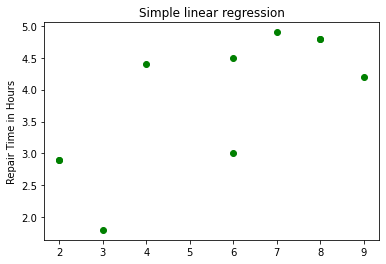

In [48]:
plt.scatter(tb1['months_since_last_service'], tb1['repair_time_in_hours'], color='green')
plt.ylabel('Repair Time in Hours')
plt.title('Simple linear regression')
plt.show()

In [49]:
Reg = sm.ols(formula='repair_time_in_hours ~ months_since_last_service', data=tb1)
Fit1 = Reg.fit()
Fit1.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Thu, 10 Mar 2022   Prob (F-statistic):             0.0163
Time:                          17:57:29   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


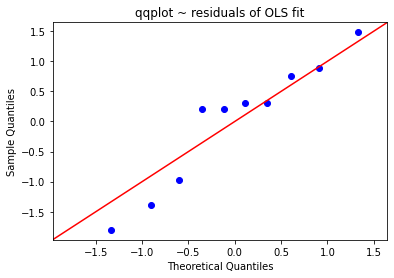

In [50]:
res = Fit1.resid  # residuals
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot ~ residuals of OLS fit')
plt.show()

In [51]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [52]:
step_1 = pd.concat([tb1, just_dummies], axis=1)
step_1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [53]:
step_1.drop(['type_of_repair', 'mechanical'], inplace=True, axis=1)

To run the regression analysis we want to get rid of the strings 'mechanical' and 'electrical' and we want to get rid of one dummy variable to avoid the dummy variable trap.

We arbitrarily chose 'mechanical', coefficients on 'electrical' would show effect of 'electrical' relative to 'mechanical'

In [54]:
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [55]:
result = s.OLS(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service', 'electrical']])).fit()

result.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Thu, 10 Mar 2022   Prob (F-statistic):            0.00105
Time:                          17:57:29   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
tbl2 = pd.read_excel('Data Files\dummy2.xlsx')
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


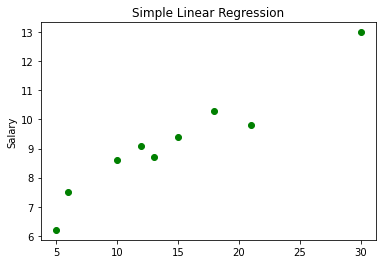

In [57]:
plt.scatter(tbl2['Experience'], tbl2['Salary'], color='green')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.show()

In [58]:
Reg2 = ols(formula='Salary ~ Experience', data=tbl2)
Fit2 = Reg2.fit()
Fit2.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           3.30e-05
Time:                        17:57:30   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
Experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external

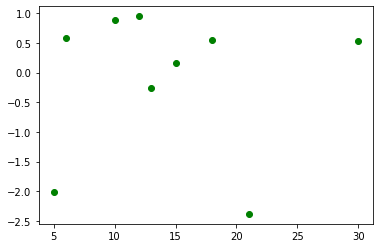

In [60]:
plt.figure()
plt.scatter(tbl2['Experience'], resid_student, color='green')

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


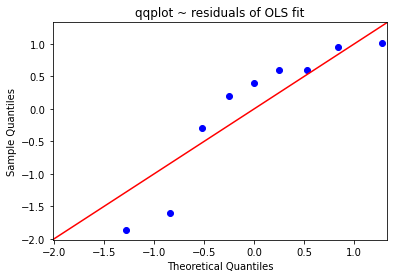

In [61]:
res = Fit2.resid
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot ~ residuals of OLS fit')
plt.show()

In [62]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [63]:
step_1 = pd.concat([tbl2, just_dummies2], axis=1)
step_1.drop(['Gender', 'Male'], inplace=True, axis=1)

result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Female']])).fit()
result.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 10 Mar 2022   Prob (F-statistic):              0.389
Time:                        17:57:30   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.000       7.682      11.718
Female        -1.1750      1.280     -0.918      0.389      -4.202       1.852
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Female', 'Experience']])).fit()
result.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.80e-05
Time:                        17:57:30   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.000       5.535       6.962
Female        -0.7890      0.238     -3.309      0.016      -1.372      -0.206
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's reverse male and female. Now male:1 and female:0

In [65]:
step_1 = pd.concat([tbl2, just_dummies2], axis=1)
step_1.drop(['Gender', 'Female'], inplace=True, axis=1)

result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Male']])).fit()
result.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 10 Mar 2022   Prob (F-statistic):              0.389
Time:                        17:57:30   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.000       6.269      10.781
Male           1.1750      1.280      0.918      0.389      -1.852       4.202
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
result = s.OLS(step_1['Salary'], s.add_constant(step_1[['Male', 'Experience']])).fit()
result.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.80e-05
Time:                        17:58:24   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4595      0.280     19.486      0.000       4.774       6.145
Male           0.7890      0.238      3.309      0.016       0.206       1.372
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""